<a href="https://colab.research.google.com/github/BrunoGAndrade/statsmodels/blob/copula-move2/Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##Importando dados da máquina local

from google.colab import files

uploaded = files.upload()

Saving vgsales.csv to vgsales.csv


In [2]:
#Importando as principais bibliotecas para análise de dados (Numpy e Pandas) e de visualização de gráficos (Matplotlib)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#O arquivo a ser análisado é o vendas de games no EUA até 2017
games = pd.read_csv("vgsales.csv")

In [4]:
#Visualizando as 5 primeiras linhas do dataset
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
#Verificando informações gerais do arquivos
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
#Verificando de quais plataformas (consoles) são os jogos do arquivo

consoles = games[["Platform"]].drop_duplicates().sort_values("Platform").set_index("Platform")
print(consoles)

Empty DataFrame
Columns: []
Index: [2600, 3DO, 3DS, DC, DS, GB, GBA, GC, GEN, GG, N64, NES, NG, PC, PCFX, PS, PS2, PS3, PS4, PSP, PSV, SAT, SCD, SNES, TG16, WS, Wii, WiiU, X360, XB, XOne]


In [7]:
#Verificando quantos jogos temos por plataforma dentro do dataset
games.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [8]:
#Renomeando as colunas para facilitar a visualização
games.Platform.value_counts().reset_index().rename(columns={'index':'Platform','Platform':'Total'})

,Platform,Total
0,DS,2163
1,PS2,2161
2,PS3,1329
3,Wii,1325
4,X360,1265
5,PSP,1213
6,PS,1196
7,PC,960
8,XB,824
9,GBA,822


In [9]:
#Verificando as vendas globais por plataforma
games.groupby(["Platform"]).Global_Sales.sum().sort_values()

Platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.87
DC        15.97
GEN       28.36
SAT       33.59
PSV       61.93
WiiU      81.86
2600      97.08
XOne     141.06
GC       199.36
SNES     200.05
N64      218.88
3DS      247.46
NES      251.07
GB       255.45
XB       258.26
PC       258.82
PS4      278.10
PSP      296.28
GBA      318.50
PS       730.66
DS       822.49
Wii      926.71
PS3      957.84
X360     979.96
PS2     1255.64
Name: Global_Sales, dtype: float64

In [10]:
#Verificandos os generos dos games com maior valor de vendas
games.groupby("Genre").Global_Sales.sum().sort_values()

Genre
Strategy         175.12
Adventure        239.04
Puzzle           244.95
Simulation       392.20
Fighting         448.91
Racing           732.04
Misc             809.96
Platform         831.37
Role-Playing     927.37
Shooter         1037.37
Sports          1330.93
Action          1751.18
Name: Global_Sales, dtype: float64

In [11]:
#Verificandos os games com maior valor de vendas
games.groupby("Name").Global_Sales.sum().sort_values()[-5:]

Name
Mario Kart Wii        35.82
Tetris                35.84
Super Mario Bros.     45.31
Grand Theft Auto V    55.92
Wii Sports            82.74
Name: Global_Sales, dtype: float64

**Iniciando a análise gráfica com o Pandas e o Matplotlib:**

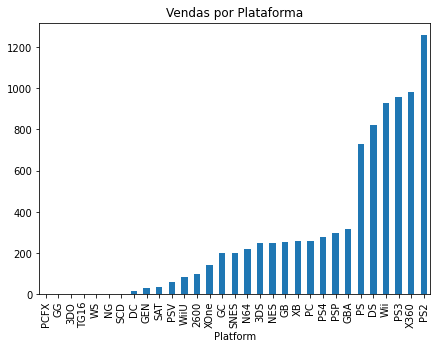

In [13]:
#Verificando gráficamente quais as plataformas com os maiores números vendas
games.groupby(["Platform"]).Global_Sales.sum().sort_values().plot(kind='bar', figsize=(7,5), title='Vendas por Plataforma')

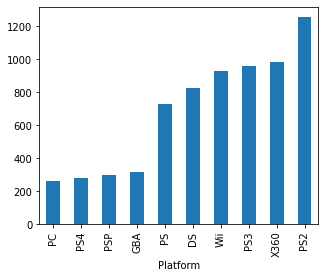

In [17]:
#Podemos verificar somente as 10 maiores e deixar o gráfico mais visual
games.groupby(["Platform"]).Global_Sales.sum().sort_values()[-10:].plot(kind='bar', figsize=(5,4))

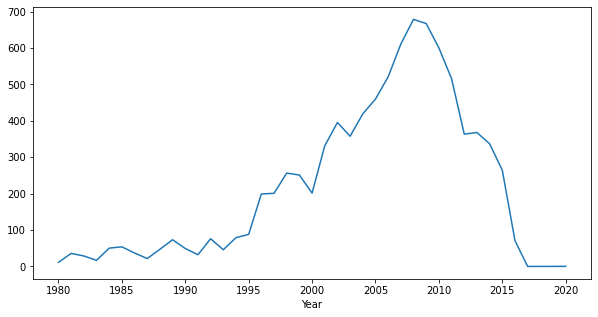

In [18]:
#Agora analisando o total de vendas anualmente
total_vendas_ano = games.groupby(['Year']).Global_Sales.sum().plot(kind='line', figsize=(10,5))


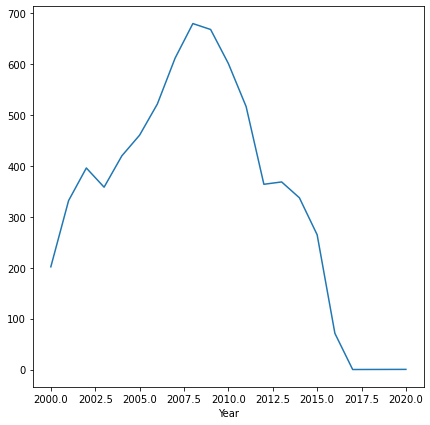

In [19]:
vendas_2000 = games.query("Year >= 2000")
vendas_2000.groupby("Year").Global_Sales.sum().plot(kind='line', figsize=(7,7))

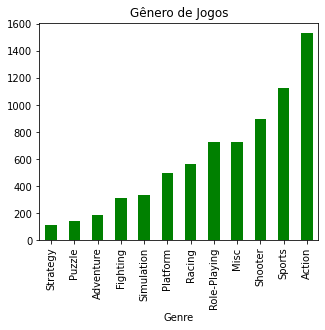

In [29]:
vendas_2000.groupby("Genre").Global_Sales.sum().sort_values().plot(kind='bar', figsize=(5,4), color='g', title="Gênero de Jogos")

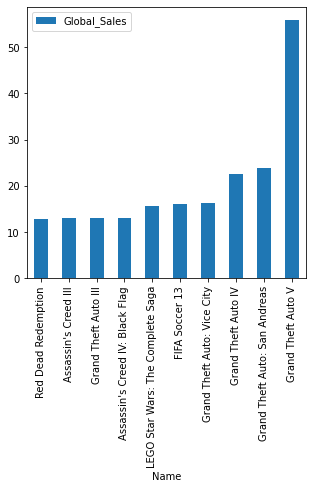

In [37]:
Action_2000 = vendas_2000[vendas_2000["Genre"] == "Action"]
Action_2000[["Name","Global_Sales"]].groupby("Name").sum().sort_values(["Global_Sales"])[-10:].plot(kind='bar', figsize=(5,5))

In [ ]:
games_2008 = games[games["Year"] == 2008.0]

In [ ]:
games_2008

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
39,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
51,52,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
56,57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
88,89,Pokémon Platinum Version,DS,2008.0,Role-Playing,Nintendo,2.82,1.78,2.69,0.55,7.84
...,...,...,...,...,...,...,...,...,...,...,...
16575,16578,Neo Angelique Special,PSP,2008.0,Adventure,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16580,16583,Real Rode,PS2,2008.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01


In [ ]:
wii_2008 = games_2008[games_2008["Platform"] == "Wii"]

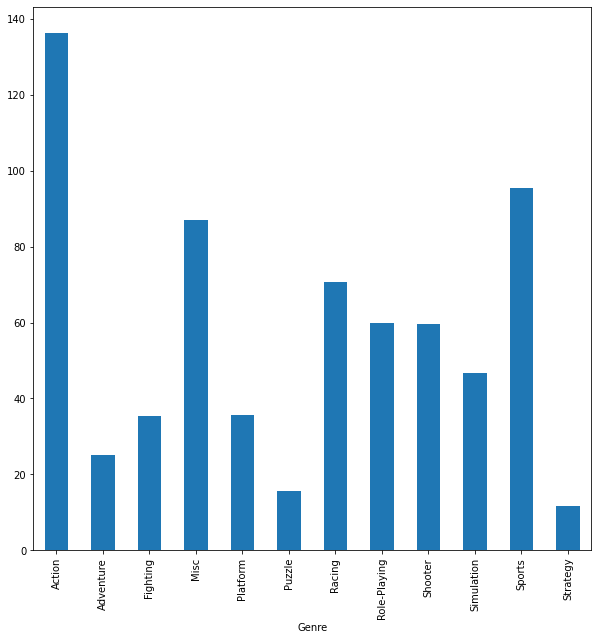

In [ ]:
wii_2008.groupby("Genre").Global_Sales.sum().plot(kind='bar', figsize=(10,10))

In [ ]:
Action_wii_2008 = wii_2008[wii_2008["Genre"]=="Action"]

In [ ]:
Action_wii_2008.groupby("Name").Global_Sales.sum().sort_values()[-5:]

Name
Kung Fu Panda                                   6.42
LEGO Batman: The Videogame                      9.18
LEGO Indiana Jones: The Original Adventures     9.66
Star Wars: The Force Unleashed                 10.23
Grand Theft Auto IV                            22.47
Name: Global_Sales, dtype: float64